# Introduction
To help the Wood lab with their Minecraft server, my project plan will address the board question: 
"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?" 

My specific question: Can age and hours played predict subscribing behaviours in the players dataset?

## Data Description

Step 1 : Load all necessary libraries and players.csv and sessions.csv

In [7]:
library(tidyverse)
library(tidymodels)

In [8]:
players_url <- "https://raw.githubusercontent.com/604Beast/Project-Planning-Stage/refs/heads/main/players.csv"
players_data <- read_csv(players_url)
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [9]:
sessions_url <- "https://raw.githubusercontent.com/604Beast/Project-Planning-Stage/refs/heads/main/sessions.csv"
sessions_data <- read_csv(sessions_url)
sessions_data 

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


For the players dataset there are 196 observations.
The 7 variables of players dataset are: 
1. **experience(chr)**: Beginner to Veteran
2. **subscribe(lgl)**: subscribed to game-related newsletter(TRUE or FALSE) 
3. **hashedEmail(chr)**: encrypted email address of player
4. **play_hours(dbl)**: total time(hours) spent playing Minecraft
5. **name(chr)**:name of the player 
6. **gender(chr)**:player is either Male or Female 
7. **age(dbl)**:age in years

For the sessions dataset there are 1535 observations.
The 5 variables of the sessions dataset are: 
1. **hashedEmail(chr)**:encrypted email address of player
2. **start_time(chr)**:date as DD/MM/YEAR and start time (24-hour clock) of session
3. **end_time(chr)**:date as DD/MM/YEAR and end time(24-hour clock) of session
4. **orginal_start_time(dbl)**:
5. **orginal_end_time(dbl)**: 


In [6]:
players_mean <- players_data|>
            select(played_hours, Age) |>
            map_df(mean, na.rm = TRUE)
players_mean

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


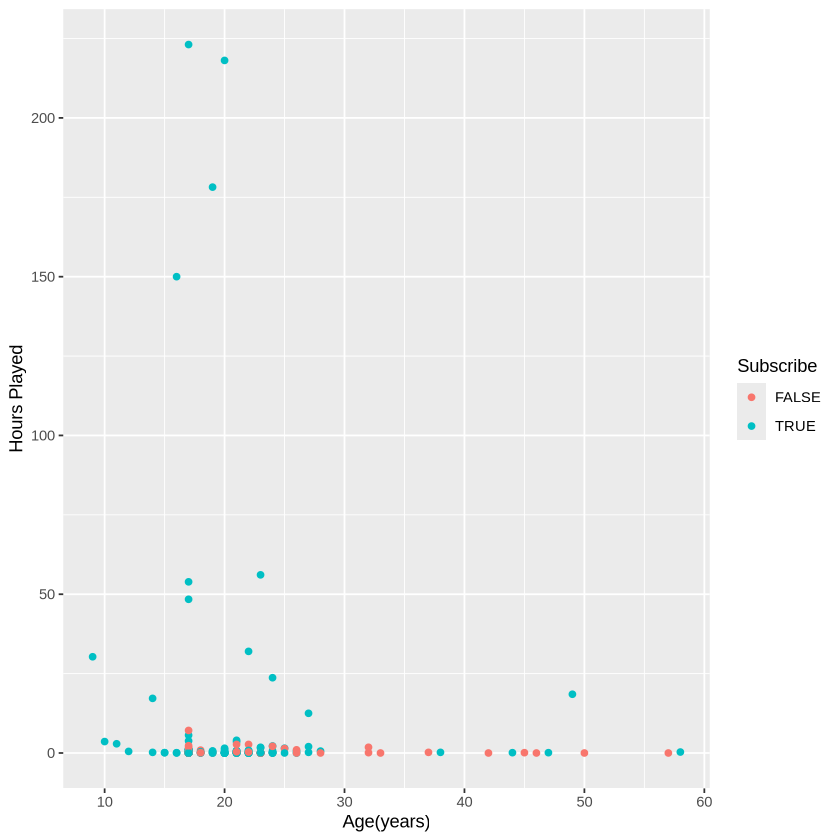

In [11]:
player_plot <- ggplot(players_data, aes( x = Age, y = played_hours, color = subscribe))+
                    geom_point()+ 
                    labs( x = "Age(years)", y = "Hours Played", color = "Subscribe")

player_plot

## Proposed Method: 

